## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(
                units=n_units, 
                activation="relu", 
                name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(
                units=n_units, 
                activation="relu",  
                name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(history):
    # plot results
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    f1 = history.history['acc']
    val_f1 = history.history['val_acc']

    plt.figure(figsize=(20, 10))
    plt.subplot(2, 1, 1)
    plt.title('Loss')
    epochs = len(loss)
    plt.plot(range(epochs), loss, marker='.', label='loss')
    plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
    plt.legend(loc='best')
    ax = plt.gca()
    ax.spines['bottom'].set_linewidth(5)
    ax.spines['top'].set_linewidth(5)
    ax.spines['right'].set_linewidth(5)
    ax.spines['left'].set_linewidth(5)
    ax.set_facecolor('snow')
    plt.grid(color='lightgray', linestyle='-', linewidth=1)
    plt.xlabel('epoch')
    plt.ylabel('loss')

    plt.subplot(2, 1, 2)
    plt.title('Accuracy')
    plt.plot(range(epochs), f1, marker='.', label='acc')
    plt.plot(range(epochs), val_f1, marker='.', label='val_acc')
    plt.legend(loc='best')
    ax = plt.gca()
    ax.spines['bottom'].set_linewidth(5)
    ax.spines['top'].set_linewidth(5)
    ax.spines['right'].set_linewidth(5)
    ax.spines['left'].set_linewidth(5)
    ax.set_facecolor('snow')
    plt.grid(color='lightgray', linestyle='-', linewidth=1)
    plt.xlabel('epoch')
    plt.ylabel('acc')
    
    plt.tight_layout()
    plt.show()

In [19]:
"""Code Here
設定超參數
"""
EPOCHS = 100
BATCH_SIZE = 256

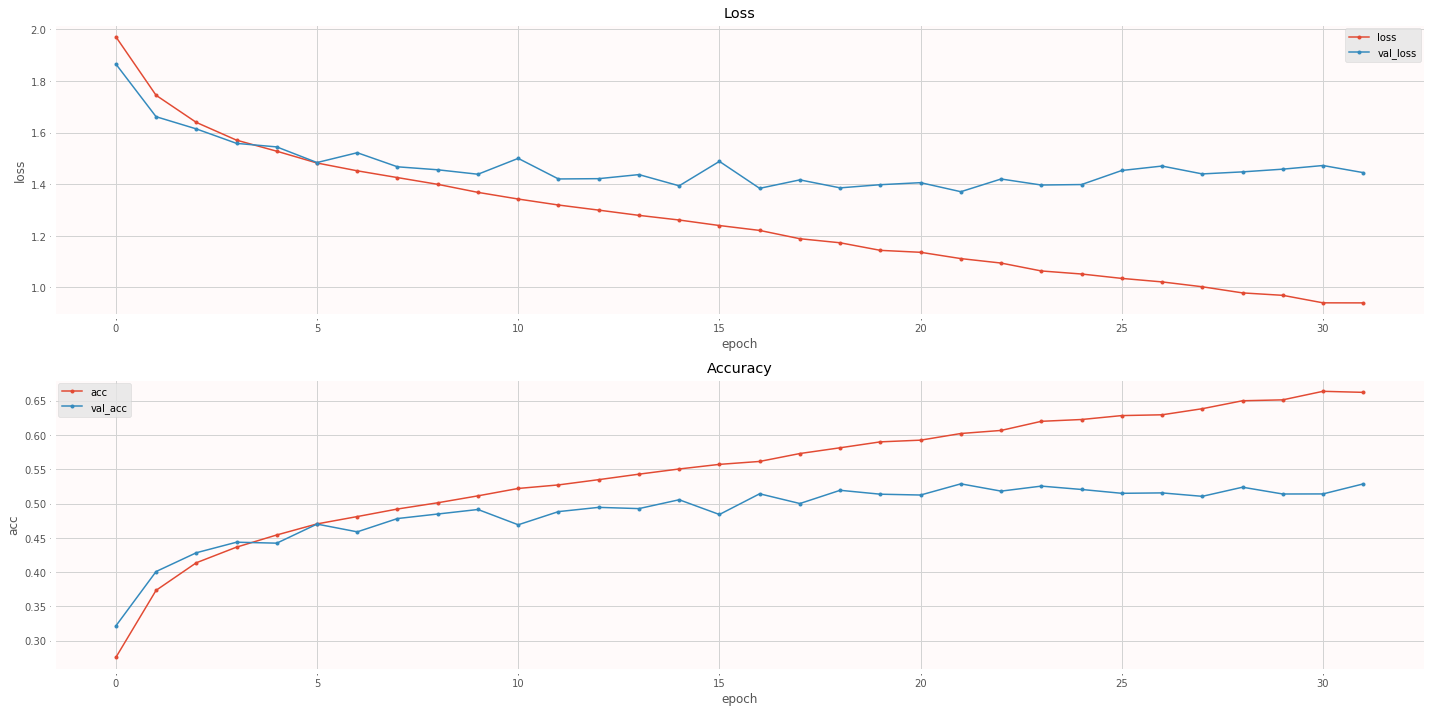

In [21]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor="val_acc", 
                          patience=10, 
                          verbose=0, 
                          mode="max")

model = build_mlp(input_shape=x_train.shape[1:])
model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer="adam")

history = model.fit(
    x_train, y_train, 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE, 
    validation_data=(x_test, y_test), 
    shuffle=True, 
    verbose=0, 
    callbacks=[earlystop])
plot_history(history)

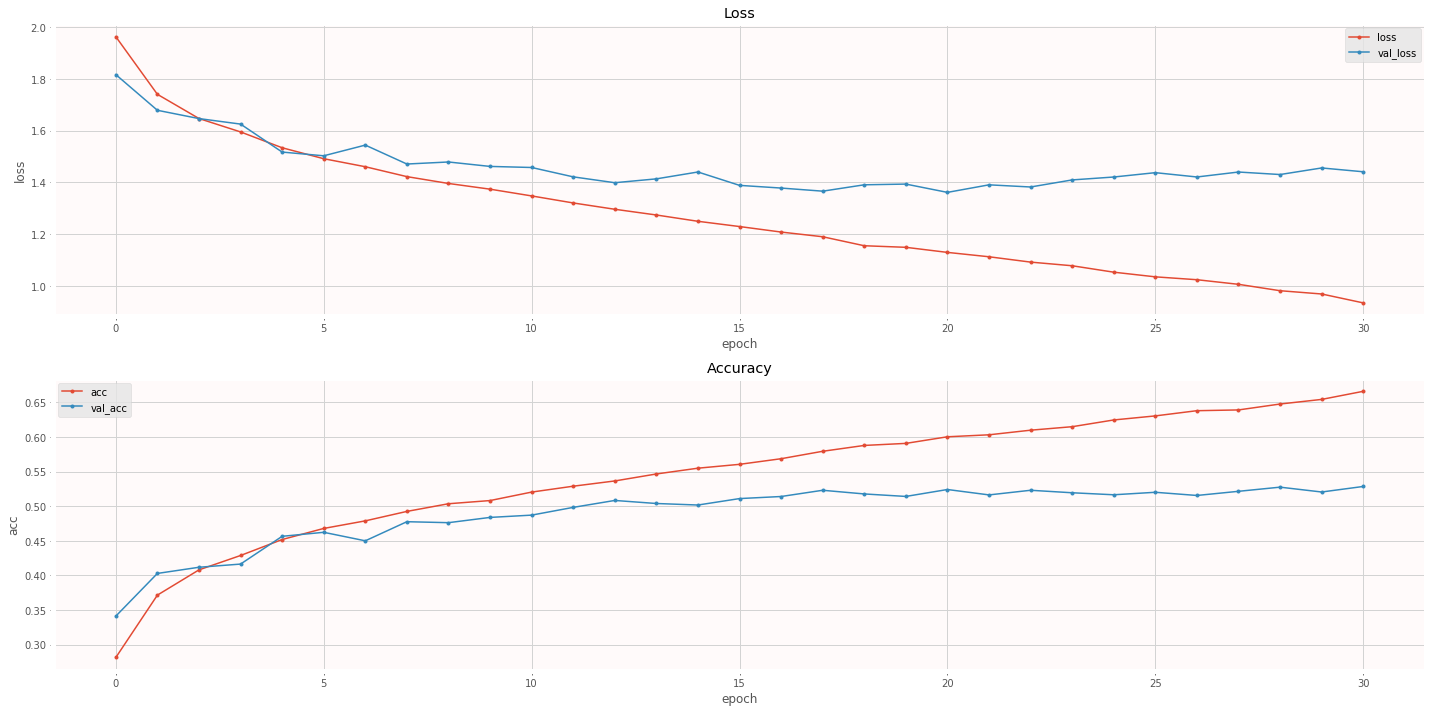

In [22]:
earlystop = EarlyStopping(monitor="val_loss", 
                          patience=10, 
                          verbose=0)

model = build_mlp(input_shape=x_train.shape[1:])
model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer="adam")

history = model.fit(
    x_train, y_train, 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE, 
    validation_data=(x_test, y_test), 
    shuffle=True, 
    verbose=0, 
    callbacks=[earlystop])
plot_history(history)

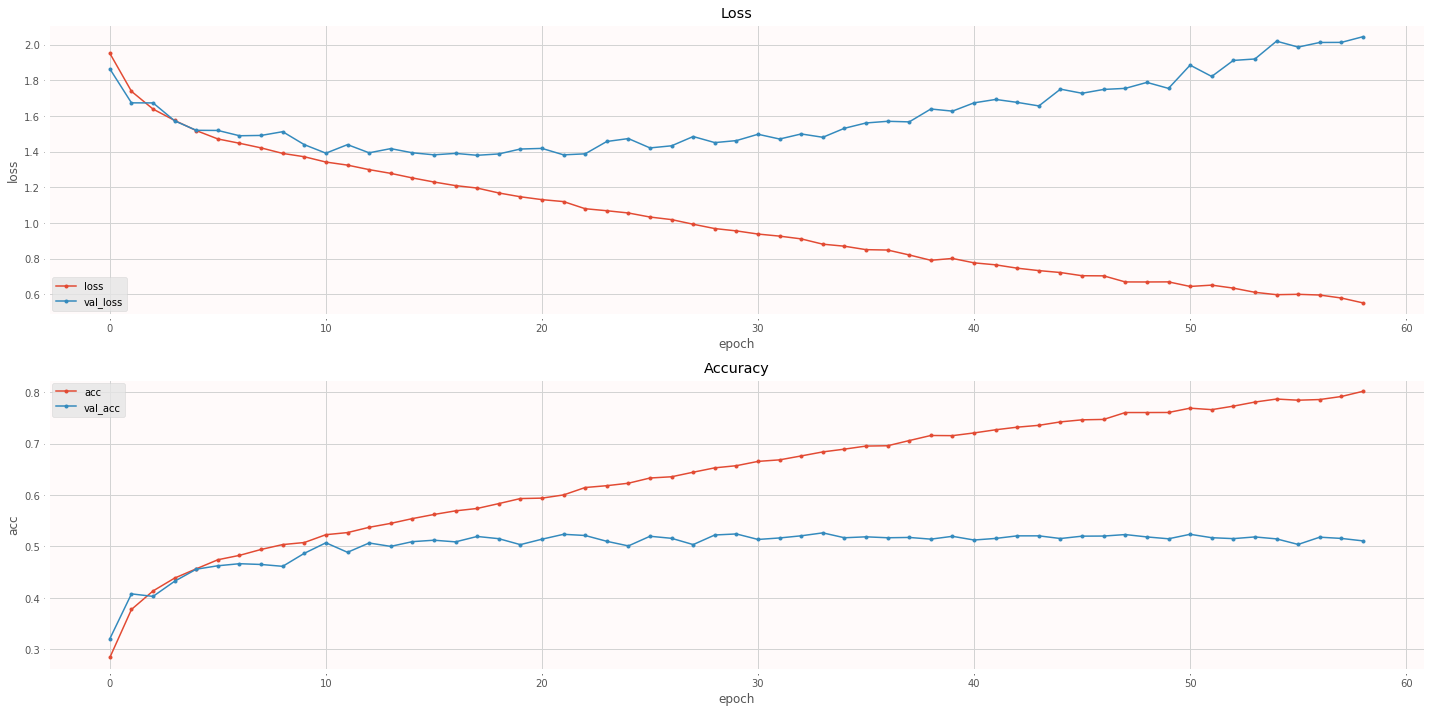

In [23]:
earlystop = EarlyStopping(monitor="val_acc", 
                          patience=25, 
                          verbose=0, 
                          mode="max")

model = build_mlp(input_shape=x_train.shape[1:])
model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer="adam")

history = model.fit(
    x_train, y_train, 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE, 
    validation_data=(x_test, y_test), 
    shuffle=True, 
    verbose=0, 
    callbacks=[earlystop])
plot_history(history)

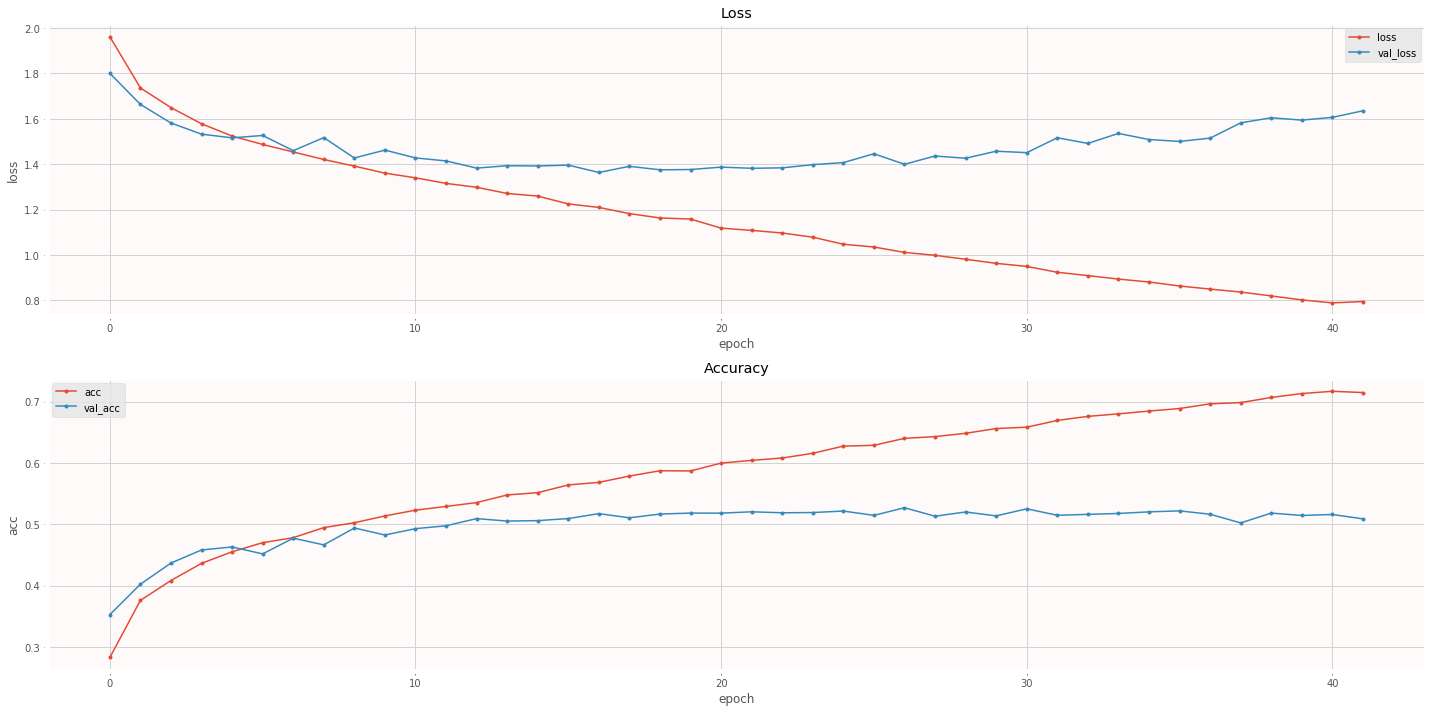

In [24]:
earlystop = EarlyStopping(monitor="val_loss", 
                          patience=25, 
                          verbose=0)

model = build_mlp(input_shape=x_train.shape[1:])
model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer="adam")

history = model.fit(
    x_train, y_train, 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE, 
    validation_data=(x_test, y_test), 
    shuffle=True, 
    verbose=0, 
    callbacks=[earlystop])
plot_history(history)